In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

In [ ]:
# Amr Ahmed ---> Project1

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving regression_project_data.csv to regression_project_data.csv


In [ ]:
data = pd.read_csv('regression_project_data.csv')

In [ ]:
data.head()

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   full_name                      17954 non-null  object 
 2   birth_date                     17954 non-null  object 
 3   age                            17954 non-null  int64  
 4   height_cm                      17954 non-null  float64
 5   weight_kgs                     17954 non-null  float64
 6   positions                      17954 non-null  object 
 7   nationality                    17954 non-null  object 
 8   overall_rating                 17954 non-null  int64  
 9   potential                      17954 non-null  int64  
 10  value_euro                     17699 non-null  float64
 11  wage_euro                      17708 non-null  float64
 12  preferred_foot                 17954 non-null 

In [ ]:
data.isnull().sum()

,0
name,0
full_name,0
birth_date,0
age,0
height_cm,0
weight_kgs,0
positions,0
nationality,0
overall_rating,0
potential,0


In [ ]:
data.drop(columns = ['name','full_name', 'birth_date', 'nationality',
'value_euro', 'wage_euro', 'preferred_foot', 'release_clause_euro',
'national_team', 'national_rating', 'national_team_position',
'national_jersey_number'], axis = 1, inplace = True)

In [ ]:
data.head()

,age,height_cm,weight_kgs,positions,overall_rating,potential,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),body_type,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,31,170.18,72.1,"CF,RW,ST",94,94,5,4,4,Messi,...,94,48,22,94,94,75,96,33,28,26
1,27,154.94,76.2,"CAM,RM,CM",88,89,3,5,4,Lean,...,89,46,56,84,91,67,88,59,57,22
2,25,190.50,83.9,"CM,CAM",88,91,4,4,5,Normal,...,82,78,64,82,88,82,87,63,67,67
3,27,162.56,59.0,"LW,ST",88,88,3,4,4,Normal,...,84,34,26,83,87,61,83,51,24,22
4,27,187.96,88.9,CB,88,91,3,3,2,Normal,...,15,87,88,24,49,33,80,91,88,87


In [ ]:
data.duplicated().sum()

2

In [ ]:
data.drop_duplicates(inplace = True)

In [ ]:
data.duplicated().sum()

0

In [ ]:
categorical_columns = ['positions', 'body_type']
for column in categorical_columns:
    encoder = LabelEncoder()
    data[column] = encoder.fit_transform(data[column])

In [ ]:
data.head()

,age,height_cm,weight_kgs,positions,overall_rating,potential,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),body_type,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,31,170.18,72.1,214,94,94,5,4,4,4,...,94,48,22,94,94,75,96,33,28,26
1,27,154.94,76.2,72,88,89,3,5,4,3,...,89,46,56,84,91,67,88,59,57,22
2,25,190.50,83.9,228,88,91,4,4,5,6,...,82,78,64,82,88,82,87,63,67,67
3,27,162.56,59.0,549,88,88,3,4,4,6,...,84,34,26,83,87,61,83,51,24,22
4,27,187.96,88.9,104,88,91,3,3,2,6,...,15,87,88,24,49,33,80,91,88,87


In [ ]:
np.max(data , axis=0)

,0
age,46.00
height_cm,205.74
weight_kgs,110.20
positions,889.00
overall_rating,94.00
potential,95.00
international_reputation(1-5),5.00
weak_foot(1-5),5.00
skill_moves(1-5),5.00
body_type,9.00


In [ ]:
np.min(data , axis=0)

,0
age,17.0
height_cm,152.4
weight_kgs,49.9
positions,0.0
overall_rating,47.0
potential,48.0
international_reputation(1-5),1.0
weak_foot(1-5),1.0
skill_moves(1-5),1.0
body_type,0.0


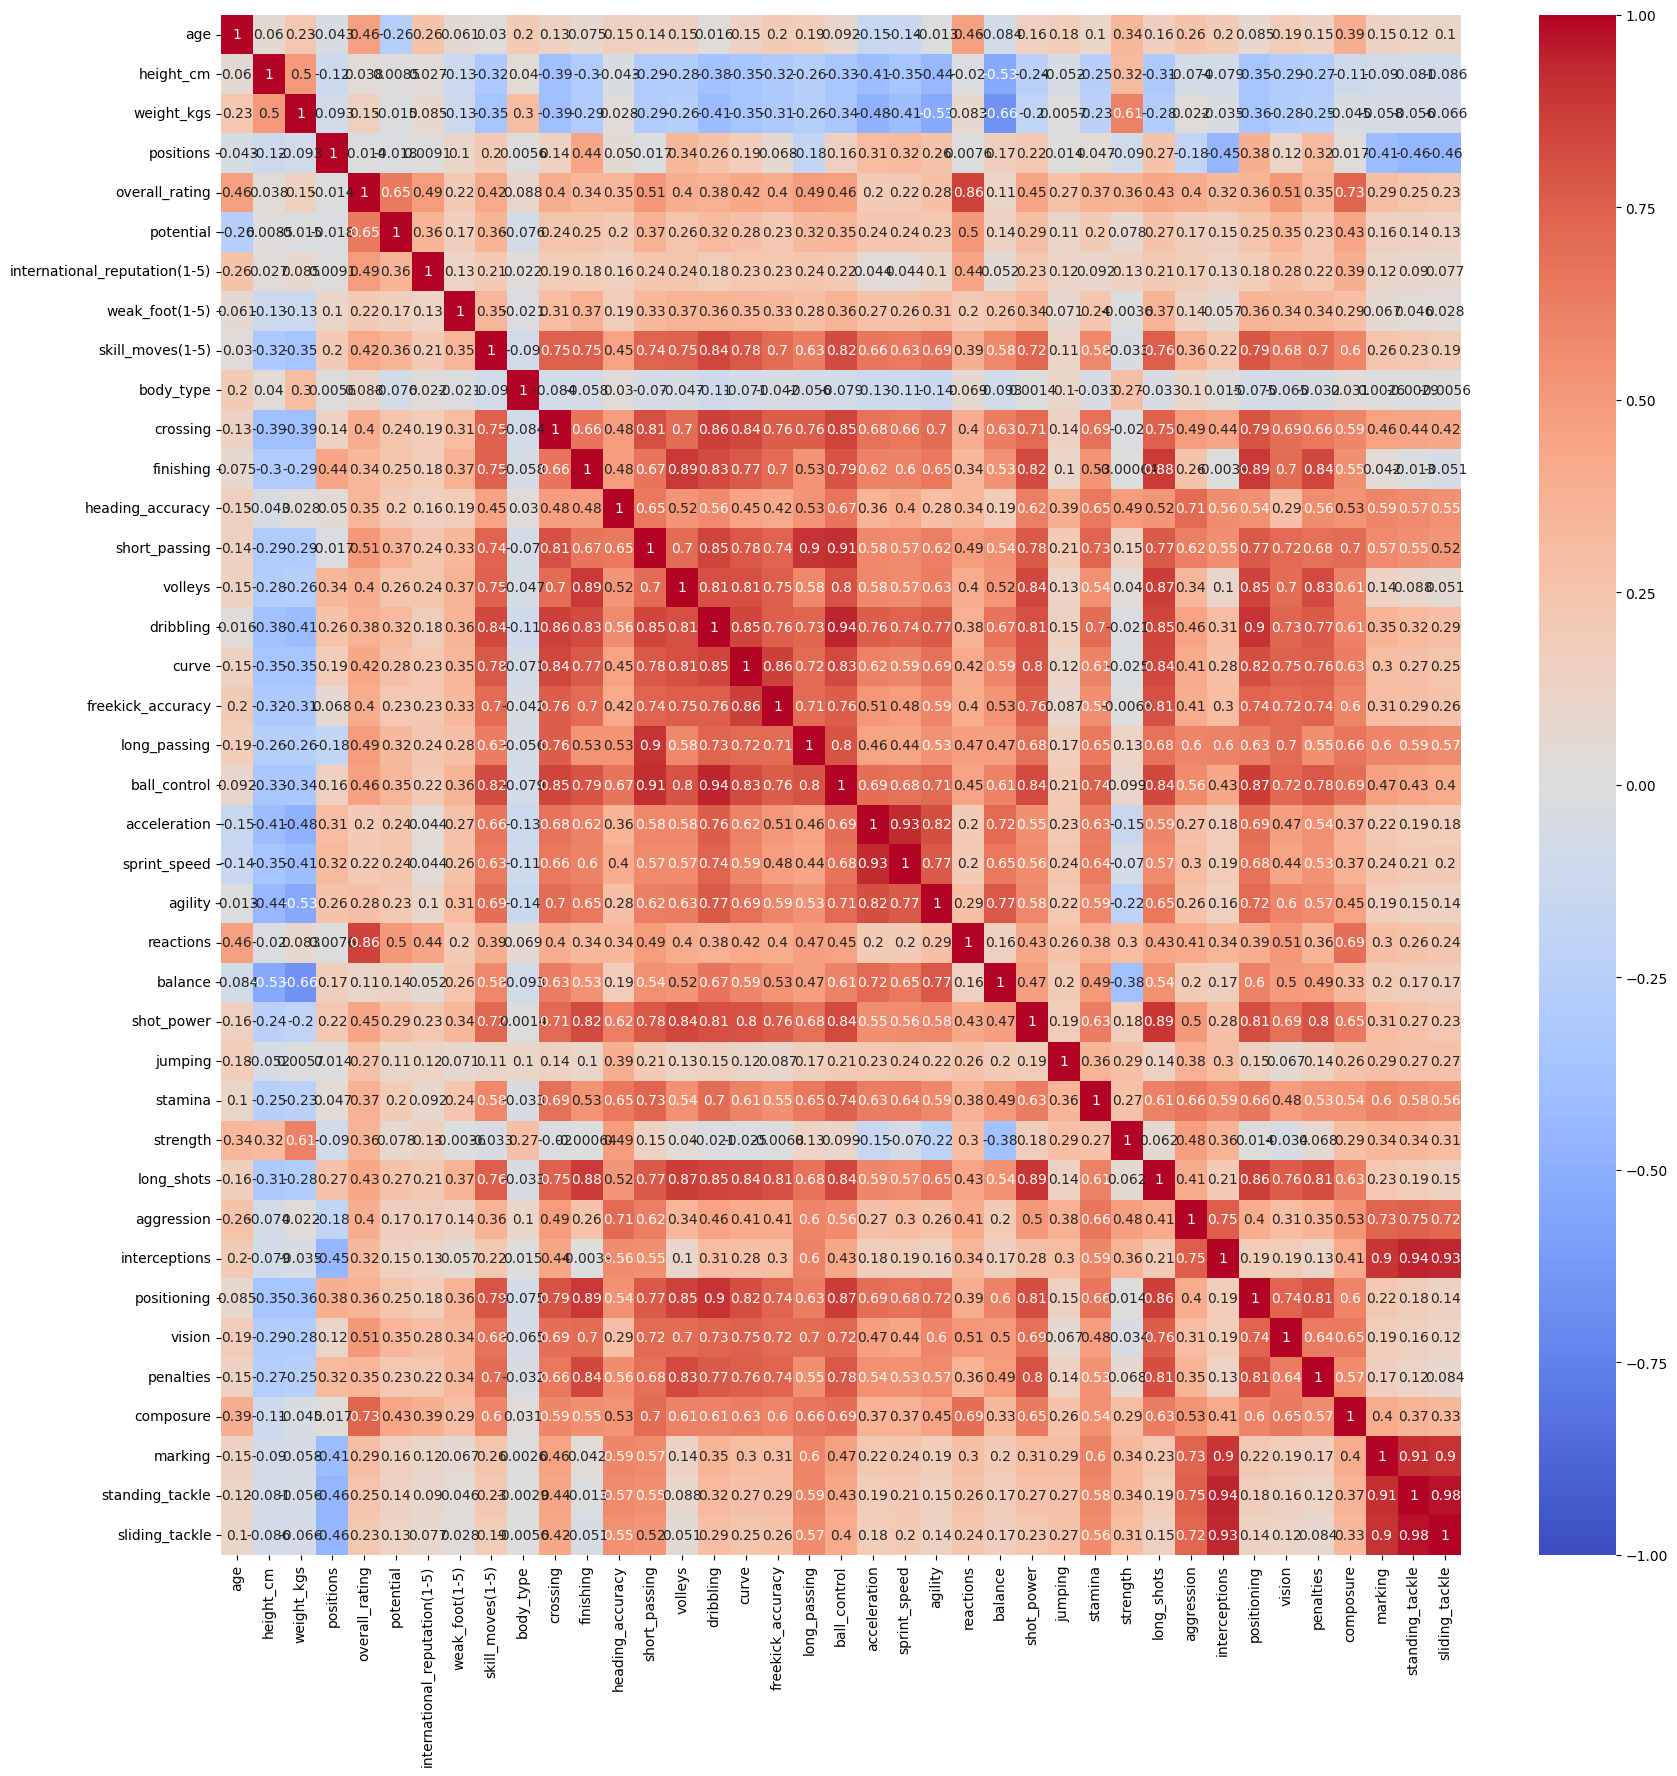

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr() , annot=True , cmap="coolwarm", vmin=-1 , vmax=1 , center=0)
plt.show()

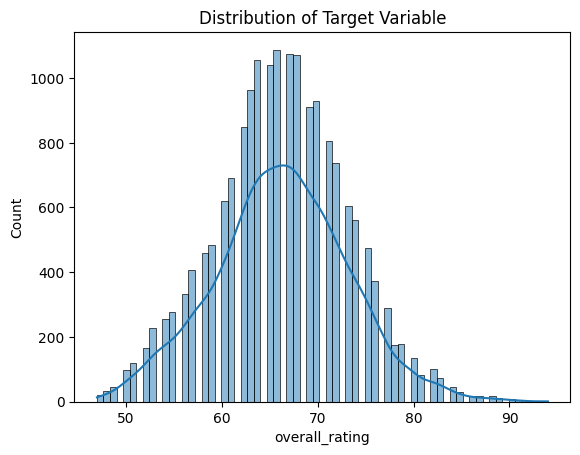

In [ ]:
sns.histplot(data['overall_rating'], kde=True)
plt.title('Distribution of Target Variable')
plt.show()

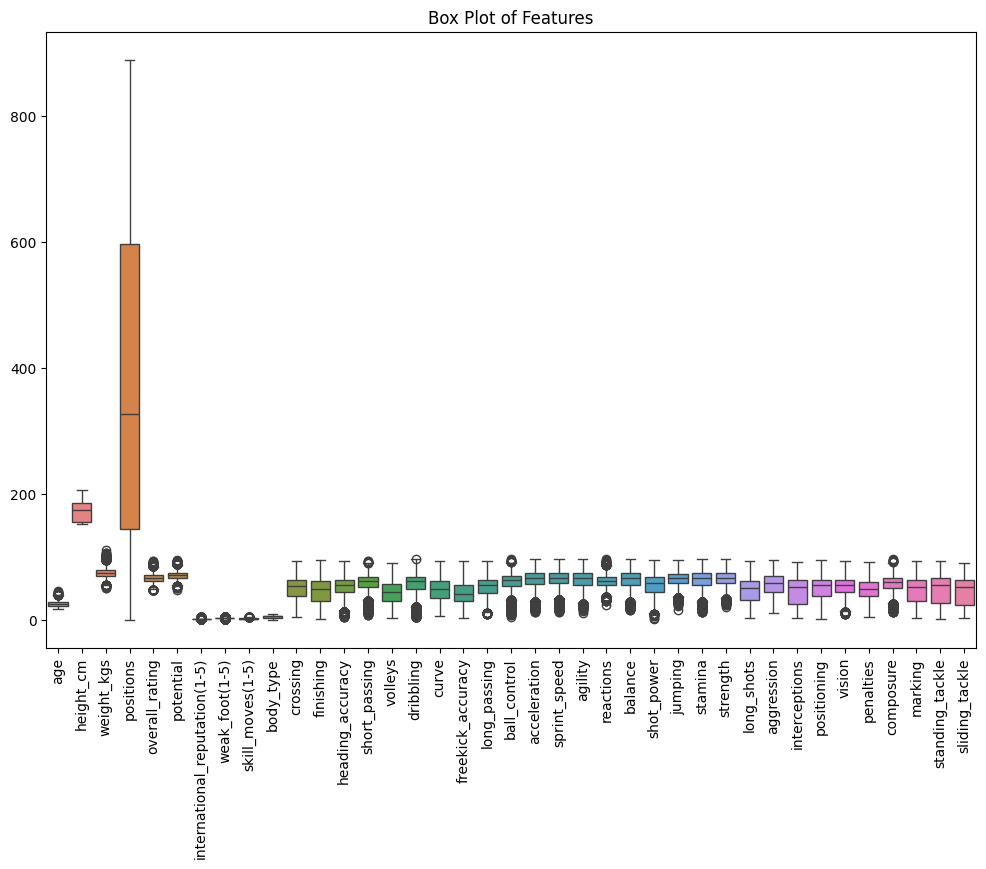

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.title('Box Plot of Features')
plt.show()

In [ ]:
x = data.drop('overall_rating', axis = 1)
y = data['overall_rating']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [ ]:
models = {
    'LinearRegression' : LinearRegression(),
    'KNeighborsRegressor' : KNeighborsRegressor(),
    'SVM' : SVR(),
    'DecisionTreeRegressor' : DecisionTreeRegressor(),
    'RandomForestRegressor' : RandomForestRegressor(),
    'AdaBoostRegressor' : AdaBoostRegressor(),
    'XGBRegressor' : XGBRegressor()
}

In [ ]:
def evaluate_model(actual, predicted):
    score = r2_score(actual, predicted)
    return score

In [ ]:
models_list = []
test_scores = []
train_scores = []
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)
    test_pred = model.predict(x_test)
    train_pred = model.predict(x_train)

    test_score = evaluate_model(y_test, test_pred)
    train_score = evaluate_model(y_train, train_pred)

    print(list(models.keys())[i])
    models_list.append(list(models.keys())[i])

    print('Model Training Performance : ')
    print("R2_Score = ", train_score)

    print('Model Testing Performance : ')
    print("R2_Score = ", test_score)

    test_scores.append(test_score)
    train_scores.append(train_score)

LinearRegression
Model Training Performance : 
R2_Score =  0.9100337415396358
Model Testing Performance : 
R2_Score =  0.9104511505249637
KNeighborsRegressor
Model Training Performance : 
R2_Score =  0.9341386113874435
Model Testing Performance : 
R2_Score =  0.9024777606566016
SVM
Model Training Performance : 
R2_Score =  0.8854527296793039
Model Testing Performance : 
R2_Score =  0.8896823841114303
DecisionTreeRegressor
Model Training Performance : 
R2_Score =  1.0
Model Testing Performance : 
R2_Score =  0.9313502487006092
RandomForestRegressor
Model Training Performance : 
R2_Score =  0.9961592632706576
Model Testing Performance : 
R2_Score =  0.9760327175830932
AdaBoostRegressor
Model Training Performance : 
R2_Score =  0.9054122042149675
Model Testing Performance : 
R2_Score =  0.9073885738001455
XGBRegressor
Model Training Performance : 
R2_Score =  0.9944939574053366
Model Testing Performance : 
R2_Score =  0.97798814319324


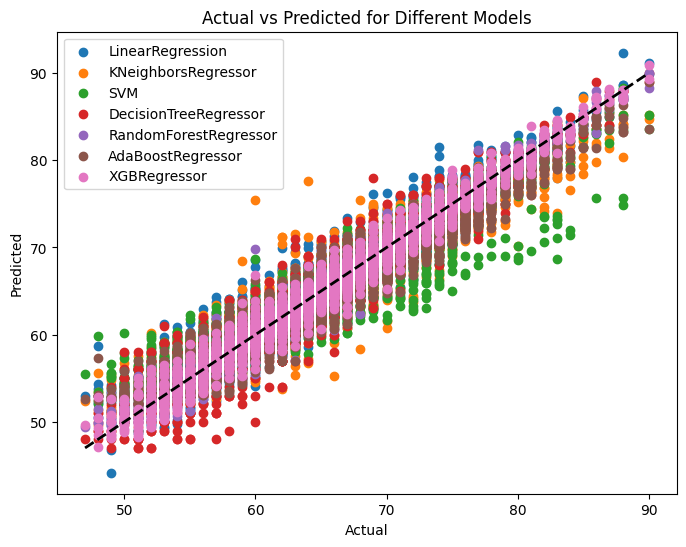

In [ ]:
# Actual vs Predicted for each model ---> i searched for this
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

for name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)

    plt.scatter(y_test, predictions, label=name)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted for Different Models')
plt.legend(loc="best")
plt.show()

In [ ]:
# i searched for this
results = []
for name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)

    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)

    results.append([name, r2, mae, rmse])

# Convert results into a DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'R² Score', 'MAE', 'RMSE'])
print(results_df)

                   Model  R² Score       MAE      RMSE
0       LinearRegression  0.910451  1.631175  2.093729
1    KNeighborsRegressor  0.902478  1.639432  2.184954
2                    SVM  0.889682  1.642669  2.323876
3  DecisionTreeRegressor  0.931936  1.175996  1.825361
4  RandomForestRegressor  0.975896  0.740496  1.086267
5      AdaBoostRegressor  0.910282  1.748569  2.095700
6           XGBRegressor  0.977988  0.745011  1.038051


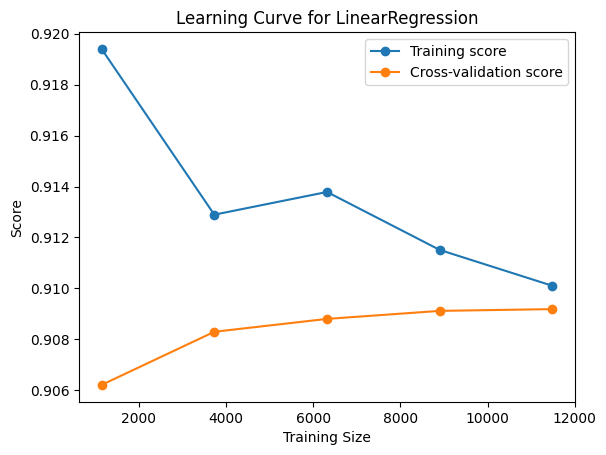

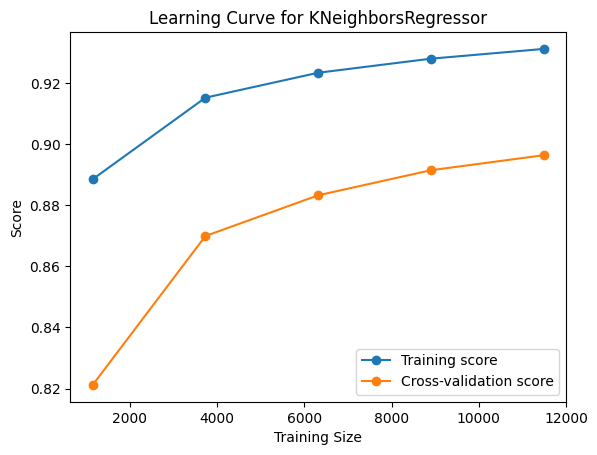

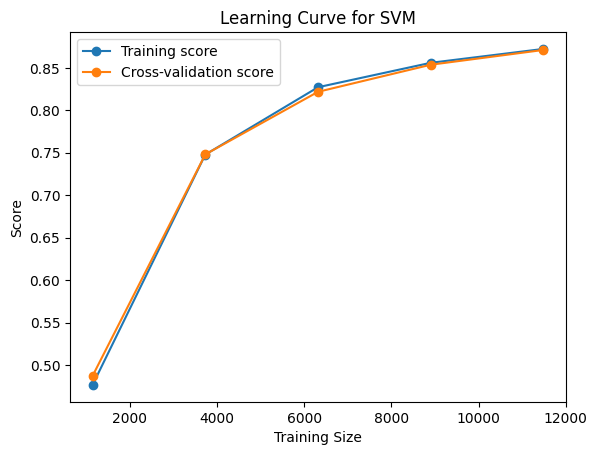

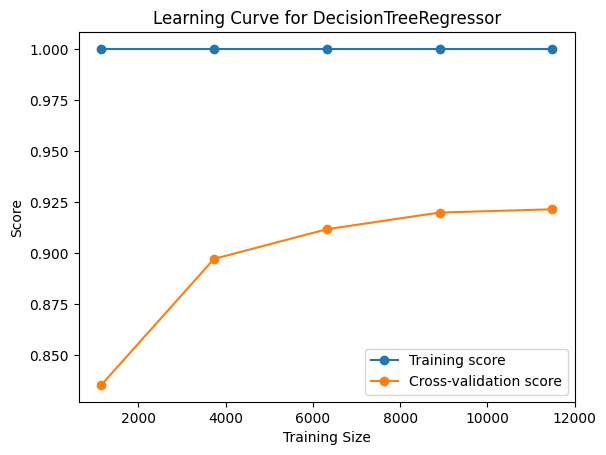

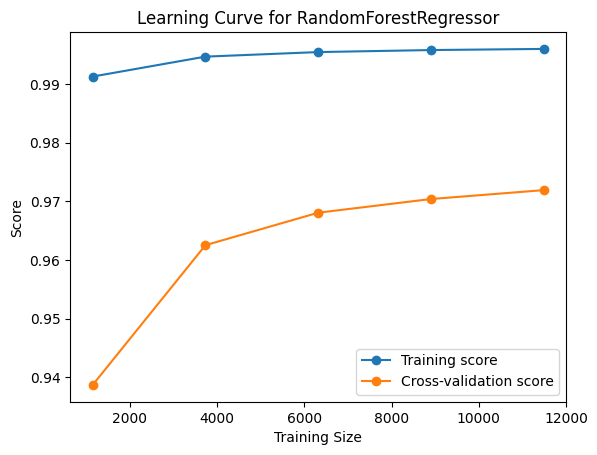

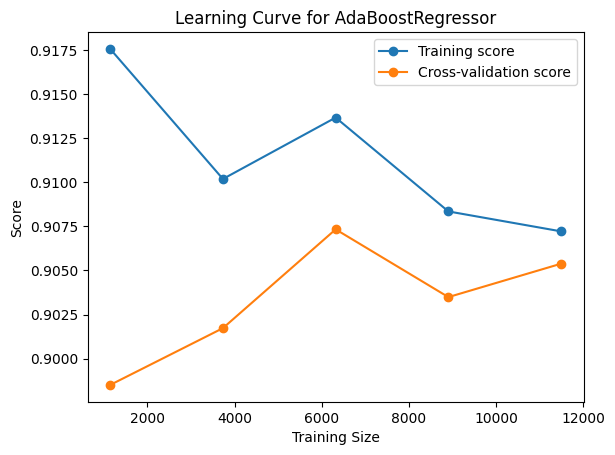

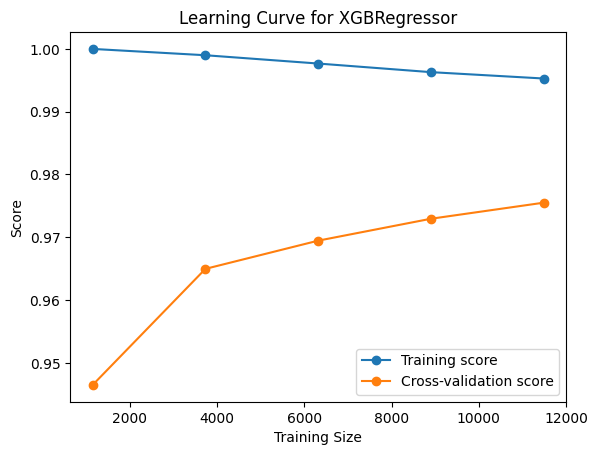

In [ ]:
# i searched for this
from sklearn.model_selection import learning_curve

for name, model in models.items():
    train_sizes, train_scores, test_scores = learning_curve(model, x_train, y_train, cv=5)

    plt.figure()
    plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label='Training score')
    plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', label='Cross-validation score')
    plt.title(f'Learning Curve for {name}')
    plt.xlabel('Training Size')
    plt.ylabel('Score')
    plt.legend(loc="best")
    plt.show()